<a href="https://colab.research.google.com/github/Gandharv18/OCR/blob/main/Optical_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Tesseract and required libraries in Google Colab
!apt-get install tesseract-ocr -y
!pip install pytesseract opencv-python pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,808 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
# Step 2: Import libraries
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
# Step 3: Upload an image
uploaded = files.upload()

Saving hdfc logo.png to hdfc logo.png


In [4]:
# Step 4: Preprocess the image
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to get a binary image
    _, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Remove noise
    processed_image = cv2.medianBlur(binary_image, 3)

    return processed_image

In [5]:
# Step 5: Extract text using Tesseract
def extract_text(image):
    text = pytesseract.image_to_string(image)
    return text

In [6]:
# Step 6: Run OCR pipeline
def ocr_pipeline(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Display original image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Preprocess image
    preprocessed_image = preprocess_image(image)

    # Extract and print text
    extracted_text = extract_text(preprocessed_image)
    print("Extracted Text:")
    print(extracted_text)

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [8]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [9]:
import pytesseract

# Step 5: Extract text using Tesseract
def extract_text(image):
    # Update tesseract_cmd to the correct path for Linux
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
    text = pytesseract.image_to_string(image)
    return text

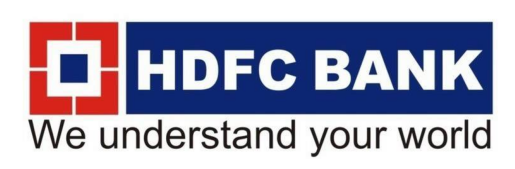

Extracted Text:
te] xenon
wy HDFC BANK

We understand your world

 



In [10]:
# Step 7: Run the OCR pipeline on the uploaded image
image_path = list(uploaded.keys())[0]  # Using the uploaded image's path
ocr_pipeline(image_path)